In [1]:
import io
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import gramgen
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
g = gramgen.GramGenerateLoss(reduction = 'mean', ignore_index = 1).to(device)
g.cuda()


GramGenerateLoss()

In [3]:
torch.manual_seed(1234)
x = torch.rand(2, 10, 17).to(device)
x.requires_grad = True
y = torch.randint(2, 10, (2, 17)).to(device)
y[:, 8:] = 1

In [4]:
lr = 10

In [5]:
print(y[0])

tensor([8, 3, 5, 6, 8, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


In [6]:
torch.manual_seed(1234)
x = torch.rand(2, 10, 177)
x.requires_grad = True
y = torch.randint(2, 10, (2, 177))
y[:, 8:] = 1

print(y[0])

tensor([7, 7, 7, 8, 9, 4, 8, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])


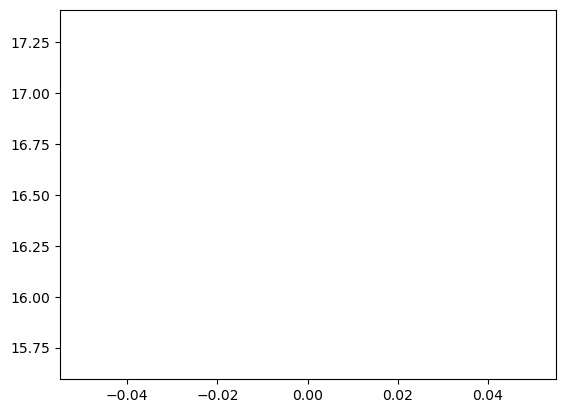

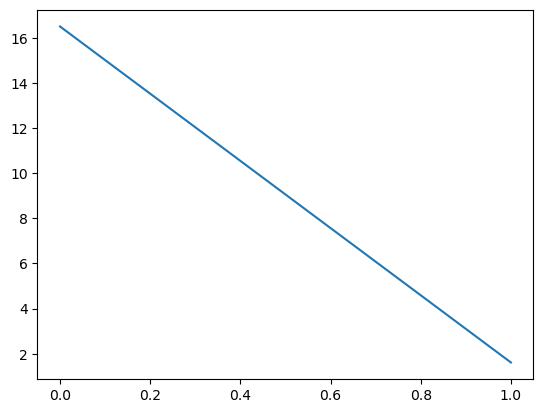

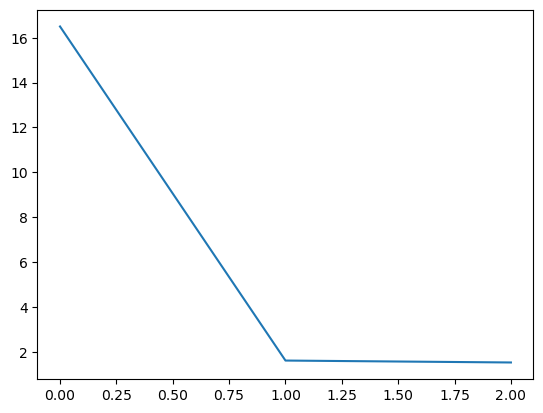

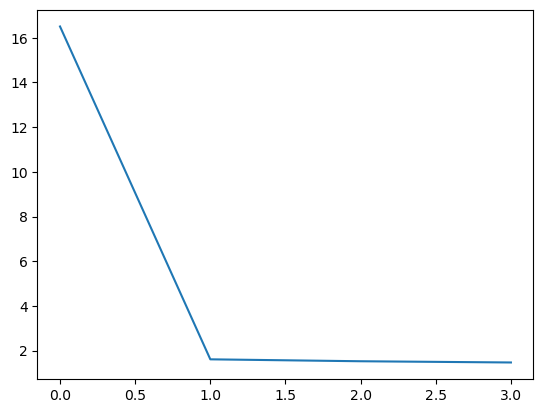

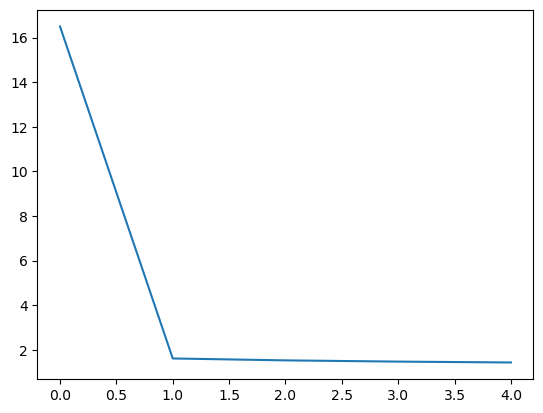

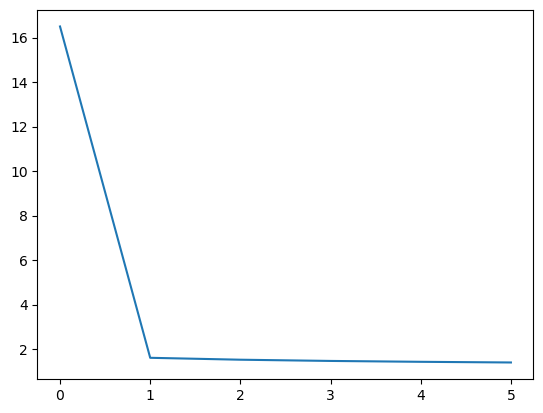

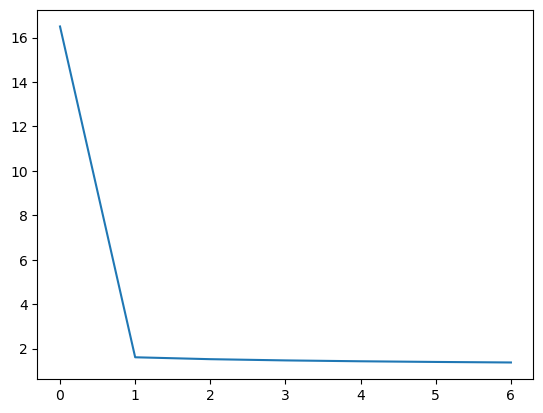

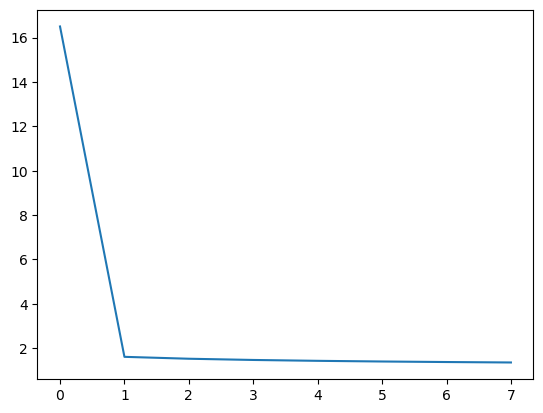

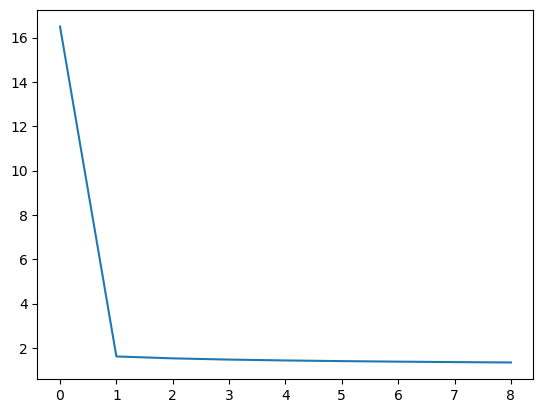

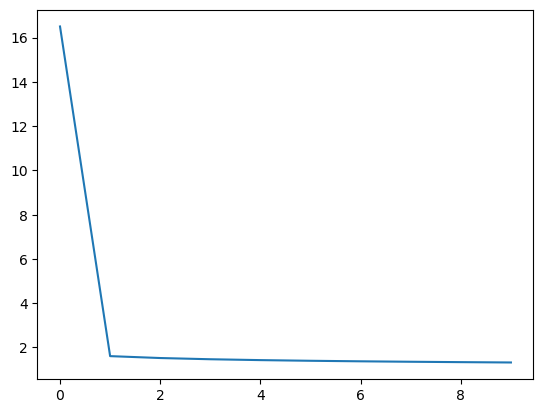

In [ ]:
import matplotlib.pyplot as plt
losses = []

for k in range(100):
    out = g(x, y)
    out.backward()
    x - x.grad
    x.data -= lr * x.grad.data
    losses.append(out.item())
    x.grad.zero_()
    plt.close()
    plt.plot(losses)
    plt.show()

In [ ]:
x[0].argmax(0)

In [ ]:
# for k in range(10):
#     out = g(x, y)
#     out.backward()
#     x - x.grad
#     x.data -= lr * x.grad.data
#     print(f"{out.item():7.3f}") 

#     for i in range(17):
#         plt.subplot(1, 17, i+1)
#         plt.bar(range(10), x[0, :, i].detach().numpy())
#         plt.bar(range(10), x.grad[0, :, i].detach().numpy())
#         plt.title(x[0, :, i].argmax().item())
#     plt.show()
#     x.grad.zero_()
